<a href="https://colab.research.google.com/github/youngmoo/ECES-434/blob/main/Class%207.1%20(2021-02-22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECES-434: Class 7.1 (2021-02-22)**
Week 7: More methods for the final project...

In [16]:
import numpy as np                      # NumPy, abbreviated as np
import matplotlib.pyplot as plt         # MatplotLib PyPlot module, abbreviated as plt
from matplotlib import animation, rc    # MatplotLib animation module
%matplotlib inline
from scipy import signal                # SciPy's signal module, for DSP functions
import soundfile as sf                  # Switching to the soundfile module for reading and writing soundfiles
import librosa

import IPython.display as ipd           # Interactive Python display module, for playing sounds
from IPython.display import HTML        # For displaying animations
rc('animation', html='jshtml')          # Provides animation controls
rc('figure', figsize=(16,4))

ClassPath = '/content/drive/My Drive/ECES-434 Sessions/Class 7-1/'

In [2]:
# CHANGE THIS to your Drexel username!!
username = 'anonymous'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Custom plotting functions
Because we're always plotting...

## plotSpectrogram

In [28]:
def plotSpectrogram(sig, fs, win='hann', nseg=512, olap=256, fft_len=512):
  
  f1, t1, Sxx = signal.spectrogram(sig, fs, window=win, nperseg=nseg, noverlap=olap, nfft=fft_len)
  fig = plt.figure(figsize=(16,6))
  
  plt.pcolormesh(t1, f1, 20*np.log10(np.abs(Sxx)))
  plt.ylabel('Frequency (Hz)')
  plt.xlabel('Time (sec)')
  return plt

## myPlot(): properly formats time domain plot of a signal

In [29]:
def myPlot(sig, fs=44100):
  fig = plt.figure(figsize=(16,4))
  t = np.arange(len(sig)) / fs
  plt.plot(t, sig)
  plt.xlabel('Time (sec)')
  return fig, plt

## myPlotFFT(): properly formats frequency domain plot of a signal

In [30]:
def myPlotFFT(sig, n_fft=0, x_lim=22050, fs=44100):
  if n_fft==0:                 
    n_fft = len(sig)                    # Default to length of input signal
  S = np.fft.fft(sig, n_fft)
  N = len(S)
  f = np.arange(N) * fs / N
  fig = plt.figure(figsize=(16,6))
  plt.plot(f, 20*np.log10(np.abs(S)))
  plt.xlim(0, x_lim)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude (dB)')
  return fig, plt  

## myPlotFFTPhase

In [31]:
def myPlotFFTPhase(sig, n_fft=0, x_lim=22050, fs=44100):
  if n_fft==0:                 
    n_fft = len(sig)                    # Default to length of input signal
  S = np.fft.fft(sig, n_fft)
  N = len(S)
  f = np.arange(N) * fs / N
  fig = plt.figure(figsize=(16,4))
  plt.plot(f, np.unwrap(np.angle(S)))
  plt.xlim(0, x_lim)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase (radians)')
  return fig, plt

## Custom FFT animation functions

In [37]:
n_o = 0
f_size = 2048
n_hop = f_size / 2
N_fft = 4096
fs = 44100
this_f = np.arange(N_fft) * fs / N_fft

# First set up the figure, the axis, and the plot element we want to animate
def setupAnimFFT(x_lim=(0,20000), y_lim=(-120,100)):
  fig = plt.figure(figsize=(14,6))
  ax = plt.axes(xlim=x_lim,ylim=y_lim)
  plt.close()   # Don't output the final figure separately
  line, = ax.plot([], [])
  fig.tight_layout()
  return fig, line

# initialization function: plot the background of each frame
def initAnimFFT():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animateFFT(i, sig):
    n1 = int(n_o + n_hop*i)
    n2 = int(n_o + n_hop*i + f_size)

    x_i = sig[n1:n2]
    X_i = np.fft.fft(x_i * np.hanning(len(x_i)), n=N_fft)
    X_mag = 20*np.log(np.abs(X_i))

    line.set_data(this_f, X_mag)
    return (line,)  

# Usage:
# fig, line = setupAnimFFT()
# anim = animation.FuncAnimation(fig, animateFFT, init_func=initAnimFFT, frames=120, fargs=(signal,), interval=1000/30, blit=True)
# anim

# Last time: Perceptual audio coding

## Masking

In [ ]:
dur = 5
fs22 = 22050
f1 = 100
f2 = 1500

chirps = []
t = np.arange(fs22 * dur) / fs22
f_up = (f2 - f1)/dur;

chirp = np.sin(np.pi*f_up*t*t + 2*np.pi*f1*t);

In [ ]:
f_c = 950
t2 = np.arange(np.ceil(fs22/4)) / fs22
tone = np.sin(2*np.pi * f_c * t2) * np.hanning(len(t2))
tone = np.append(tone, np.zeros(int(fs22/4)))
tones = np.tile(tone,2*dur)
plt.plot(tones)
plt.xlim(0,22050)
ipd.Audio(tones,rate=fs22)

In [ ]:
test = chirp + 0.01*tones
ipd.Audio(test,rate=22050)

(0.0, 2000.0)

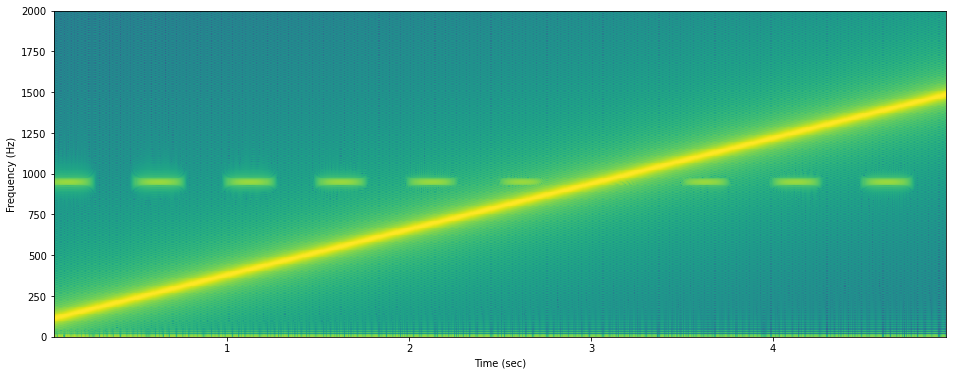

In [ ]:
splot = plotSpectrogram(test, 22050, nseg=2048, olap=1920, fft_len=4096)
splot.ylim(0,2000)

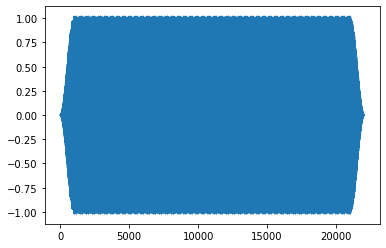

In [ ]:
f_p = 1000    # Frequency of peak (masking tone)
f_m = 1150     # Frequency of masked tone 
a_m = 0.022    # Amplitde of masked tone

tt = np.arange(fs22)/fs22 # One second of samples

peak_tone = np.sin(2*np.pi * f_p * tt)
mask_tone = a_m * np.sin(2*np.pi * f_m * tt)

test_tone = peak_tone + mask_tone

fade = np.hanning(2048)
fade_in = fade[:1024]
fade_out = fade[1024:2048]

test_tone[:1024] *= fade_in
test_tone[len(test_tone)-1024:len(test_tone)] *= fade_out

plt.plot(test_tone)
ipd.Audio(test_tone, rate=fs22)

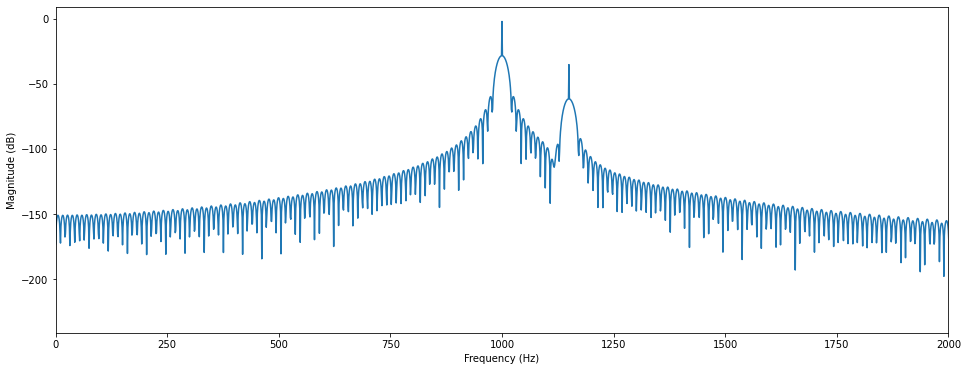

In [ ]:
myPlotFFT(test_tone / sum(np.abs(test_tone)), fs=22050, x_lim=2000)
# plt.savefig(ClassPath + 'figs/' + username + '-%d-%0.4f.png' %(f_m, a_m))

# Today's sound file
Same as last class: *Need You Tonight* by INXS (1987)

In [11]:
inxs_s, fs48 = sf.read(ClassPath + 'INXS-44kHz.wav')
inxs = np.mean(inxs_s,axis=1)
print(fs48)
ipd.Audio(inxs,rate=fs48)

48000


# Start with the spectrogram (STFT)
Using Librosa STFT

In [13]:
nFFT = 2048
nHop = 512

INXS = librosa.stft(inxs,n_fft=nFFT, hop_length=nHop)
nBins, nFrames = np.shape(INXS)
(nBins, nFrames)

(1025, 2106)

In [ ]:
# Create frequency and time axes
f1 = np.arange(nBins)/(nFFT/2) * (fs48/2)
t1 = np.arange(nFrames) * nHop / fs48


plt.figure(figsize=(16,6))
plt.pcolormesh(t1, f1, 20*np.log10(np.abs(INXS)))
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')

# Adjust axis limits
plt.ylim(0,2000)
plt.xlim(0,5)

In [ ]:
ipd.Audio(inxs[:fs48*5], rate=fs48)

In [ ]:
fig, line = setupAnimFFT(x_lim=(0,2000))
anim = animation.FuncAnimation(fig, animateFFT, init_func=initAnimFFT, frames=150, fargs=(inxs,), interval=1000/30, blit=True)
anim

In [ ]:
plt.plot(f1, 20*np.log10(np.abs(INXS[:,100])))

# Zoom in on an area of interest
# plt.xlim(0,2500)

# Let's make a "filter"

In [ ]:
plt.plot(f1)
# plt.ylim(250,1000)
# plt.xlim(11,48)
# f[23:48]

## Design an unevenly weighted triangle

In [ ]:
H = np.zeros(nBins)
H[11:22] = (f1[11:22] - 250)/250
H[22:43] = 1 - (f1[22:43]- 500)/500

plt.plot(f1, H)
#plt.xlim(10,48)

# plt.savefig(ClassPath + 'filters/' + username + '.png')

In [ ]:
# Need this in order to tile it for the full STFT matrix
H.shape = (nBins,1)
np.shape(H)

In [ ]:
H_500 = np.tile(H, (1,nFrames)) 
np.shape(H_500)

In [ ]:
plt.pcolormesh(t1,f1, H_500)
#plt.ylim(0,2000)

## Filter (multiply spectrogram) with the uneven triangle

In [ ]:
INXS_500 = INXS * H_500
np.shape(INXS_500)

In [ ]:
plt.pcolormesh(t1, f1, 20*np.log10(np.abs(INXS_500)))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# plt.ylim(0,1500)

## Use Librosa's *Inverse* STFT to resynthesize sound
What have we actually done?

In [ ]:
inxs_500 = librosa.istft(INXS_500)
ipd.Audio(inxs_500, rate=fs48)

# my_inxs = ...
# sf.write(ClassPath + 'sounds/' + username + '-filtered.wav', my_inxs, fs48)

# Find the *max* frequency peak in our filtered band

In [ ]:
maxf_idx = np.argmax(np.abs(INXS_500), axis=0)
INXS_500_maxf = np.zeros((1025,2106) )

for n in range(2106):
  INXS_500_maxf[maxf_idx[n], n] = INXS_500[maxf_idx[n], n]

plt.pcolormesh(t1, f1, 20*np.log10(np.abs(INXS_500_maxf)))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim(0,1500)

# 
# plt.savefig(ClassPath + 'peaks/' + username + '.png')

In [ ]:
inxs_500_maxf = librosa.istft(INXS_500_maxf)
plt.plot(inxs_500_maxf)
ipd.Audio(inxs_500_maxf, rate=fs48)

# my_inxs_maxf = ...
# sf.write(ClassPath + 'maxf-sounds/' + username + '-maxf.wav', my_inxs_maxf, fs48)

In [ ]:
plt.plot(inxs_500)
ipd.Audio(inxs_500, rate=fs48)

# Compute the per frame energy in our filtered band

In [ ]:
E = np.sum(np.abs(INXS_500), axis=0) / 1000
np.shape(E)
plt.plot(E)

## Make some random noise

In [72]:
noiz = 2*np.random.rand(len(inxs)) - 1

In [ ]:
NOIZ = librosa.stft(noiz)

plt.pcolormesh(t1, f1, 20*np.log10(np.abs(NOIZ)))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

## Shape (multiply) the noise by the energy in our filter band

In [ ]:
E.shape = (1,2106)
E_env = np.tile(E, (1025,1))

np.shape(E_env)
plt.pcolormesh(t1, f1, E_env)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

In [ ]:
H_500_env = H_500 * E_env
plt.pcolormesh(t1, f1, H_500_env)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

plt.ylim(0,5000)

In [ ]:
INXS_n500_env = NOIZ * H_500_env
plt.pcolormesh(t1, f1, 20*np.log10(np.abs(INXS_n500_env)))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim(0,5000)

# 
# plt.savefig(ClassPath + 'noise-filter/' + username + '.png')

In [ ]:
inxs_n500_env = librosa.istft(INXS_n500_env)
plt.plot(inxs_n500_env)
ipd.Audio(inxs_n500_env,rate=fs48)

# Add the shaped noise plus max frequency peak in the filtered band

In [ ]:
inxs_new = inxs_n500_env + inxs_500_maxf
plt.plot(inxs_new)

In [ ]:
ipd.Audio(inxs_new, rate=fs48)

In [ ]:
# my_inxs = ...
# sf.write(ClassPath + 'sounds/' + username + '.wav', my_inxs, fs48)

In [ ]:
ipd.Audio(inxs_n500_env, rate=fs48)

In [ ]:
ipd.Audio(inxs_500, rate=fs48)

# Computing Compression

In [ ]:
fs = 44100
bits = 16
channels = 2

bitrate = fs * bits * channels
bitrate

1411200

## Quantization

In [ ]:
n_bits = 8
inxs_q = np.floor(inxs * 2**(n_bits-1))
myPlot(inxs_q)
ipd.Audio(inxs_q, rate=fs44)